<center>

<img src="https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/file-uploads/sites/2148158644/images/85d1d5-f44-11de-03a0-b8b70657ae6f_pinecone.jpeg" width=80%>
</center>

**[Pinecone](https://www.pinecone.io/)** is a fully managed vector database built specifically for **high-performance vector search**. It helps you **store, index, and search vector embeddings** at scale without managing the infrastructure yourself.

To use **Pinecone** for semantic vector storage and search, we’ll need:

* `langchain`: for chaining and embedding integration  
* `pinecone-client`: to interact with **Pinecone DB**  
* Either:
  * `openai` + `tiktoken`: for **OpenAI embeddings**  
  * `google-generativeai`: for **Gemini embeddings**  

**Steps:**

1. **Get API Keys**

   * Create an account on Pinecone and obtain your Pinecone API key.
   * Obtain an API key from either OpenAI or Google, depending on whether you want to use OpenAI embeddings or Gemini embeddings.

2. **Initialize Pinecone**

   Connect your application to Pinecone using the API key and select or create an index where your vectors will be stored.

3. **Generate Embeddings**

   Use an embedding model (from OpenAI or Gemini) to convert text into numerical vector representations.

4. **Ingest Vectors**

   Store these generated vectors in Pinecone’s index, optionally attaching metadata such as the original text or tags.

5. **Search Embed Query**

   Convert a new query into an embedding and search Pinecone to retrieve the most similar vectors, along with their metadata, in real-time.




In [ ]:
# Install necessary libraries (using gemini embeddings)
!pip install langchain langchain-community pinecone-client pypdf -q
!pip install "google-ai-generativelanguage>=0.6.18,<0.7.0" langchain-google-genai -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.5/323.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you ha

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
loader = PyPDFLoader("MachineTranslationwithAttention.pdf")
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [ ]:
pages[0].metadata

{'producer': 'pdfTeX-1.40.21',
 'creator': 'LaTeX with hyperref',
 'creationdate': '2021-11-05T20:59:50+00:00',
 'author': '',
 'keywords': '',
 'moddate': '2021-11-05T20:59:50+00:00',
 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2',
 'subject': '',
 'title': '',
 'trapped': '/False',
 'rgid': 'PB:355917108_AS:1086893412356097@1636146991241',
 'source': 'MachineTranslationwithAttention.pdf',
 'total_pages': 11,
 'page': 0,
 'page_label': '1'}

In [ ]:
pages[1].page_content

'Neural Machine Translation with Attention\nMohammad Wasil Saleem\nMatrikel-Nr.: 805779\nUniversit¨at Potsdam\nsaleem1@uni-potsdam.de\nSandeep Uprety\nMatrikel-Nr. 804982\nUniversit¨at Potsdam\nuprety@uni-potsdam.de\nAbstract\nIn recent years, the success achieved\nthrough neural machine translation has\nmade it mainstream in machine translation\nsystems. In this work, encoder-decoder\nwith attention system based on ”Neural\nMachine Translation by Jointly Learning\nto Align and Translate” by Bahdanau et al.\n(2014) has been used to accomplish the\nMachine Translation between English and\nSpanish Language which has not seen\nmuch research work done as compared\nto other languages such as German and\nFrench. We aim to demonstrate the re-\nsults similar to the breakthrough paper on\nwhich our work is based on. We achieved\na BLEU score of 25.37, which was close\nenough to what Bahdanau et al. (2014)\nachieved in their work.\n1 Introduction\nMachine Translation (MT) is the task of translat

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1024,
    chunk_overlap=32
)

In [ ]:
text_chunks = text_splitter.split_documents(pages)
text_chunks[:3]

[Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2021-11-05T20:59:50+00:00', 'author': '', 'keywords': '', 'moddate': '2021-11-05T20:59:50+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'subject': '', 'title': '', 'trapped': '/False', 'rgid': 'PB:355917108_AS:1086893412356097@1636146991241', 'source': 'MachineTranslationwithAttention.pdf', 'total_pages': 11, 'page': 0, 'page_label': '1'}, page_content='See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/355917108\nNeural Machine Translation with Attention\nTechnical Report · August 2021\nDOI: 10.13140/RG.2.2.29381.37607/1\nCITATION\n1\nREADS\n5,448\n2 authors:\nMohammad Wasil Saleem\nUniversität Potsdam\n4 PUBLICATIONS\xa0\xa0\xa02 CITATIONS\xa0\xa0\xa0\nSEE PROFILE\nSandeep Uprety\nUniversität Potsdam\n1 PUBLICATION\xa0\xa0\xa01 CITATION\xa0\xa0\xa0\nSEE PROF

In [ ]:
print(text_chunks[3].page_content)

tion process, freeing the need for excessive fea-
ture engineering. Through the rapid research and
breakthroughs, end-to-end neural machine trans-
lation has gained remarkable performances (Shi
et al., 2021; Bahdanau et al., 2014) and have be-
come mainstream approach to MT.
2 Related Work
Early problem of NMT was often the poor trans-
lation for long sentences (Sutskever et al., 2014)
which can be attributed to the ﬁxed-length of
source encoding in conventional encoder-decoder
as suggested by Cho et al. (2014a) for which the
concept of attention to NMT was introduced by
Bahdanau et al. (2014) to avoid keeping a ﬁxed
source side representation.
As compared to separately tuned components in
SMT, newly emerging Neural Machine translation
radically departures from previous machine learn-
ing approaches as the training of NMT is end-to-
end which has signiﬁcantly improved translation
quality across 30 different languages (Junczys-
Dowmunt et al., 2016). NMT model can be attrac-


In [ ]:
print(text_chunks[4].page_content)

tive for various reason one being scalability issue,
whether it be memory requirements or computa-
tional speed. Another being able to train all the
character embedding as each characters frequently
occurs in the training corpus.
Most neural machine translation models pro-
posed use encoder-decoder where a neural net-
work reads and encodes a source sentence into
a ﬁxed-length vector and a decoder then outputs
a translation from the encoded vector, where in
most of the cases the encoder and decoder are
mainly implemented as RNNs, CNNs or self-
attention network (Wu et al., 2018). The whole
encoder–decoder system, which consists of the
encoder and the decoder for a language pair, is


In [ ]:
import os
from dotenv import load_dotenv

# Load the .env file
load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")
PINECONE_API_ENV = "GenAI"

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings, ChatGoogleGenerativeAI

embeddings = GoogleGenerativeAIEmbeddings(model="text-embedding-004")
vector = embeddings.embed_query("hello, world!")
vector[:5]

[0.006846265867352486,
 -0.02251487784087658,
 -0.05496913567185402,
 -0.020021894946694374,
 -0.010026923380792141]

In [ ]:
len(vector)     # Dimension of the embedding model

768

Now let's install `langchain-pinecone`

In [ ]:
!pip install langchain-pinecone -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.5/449.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.6/587.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.7 MB/s eta 0:00:00




## Creating an Index in Pinecone

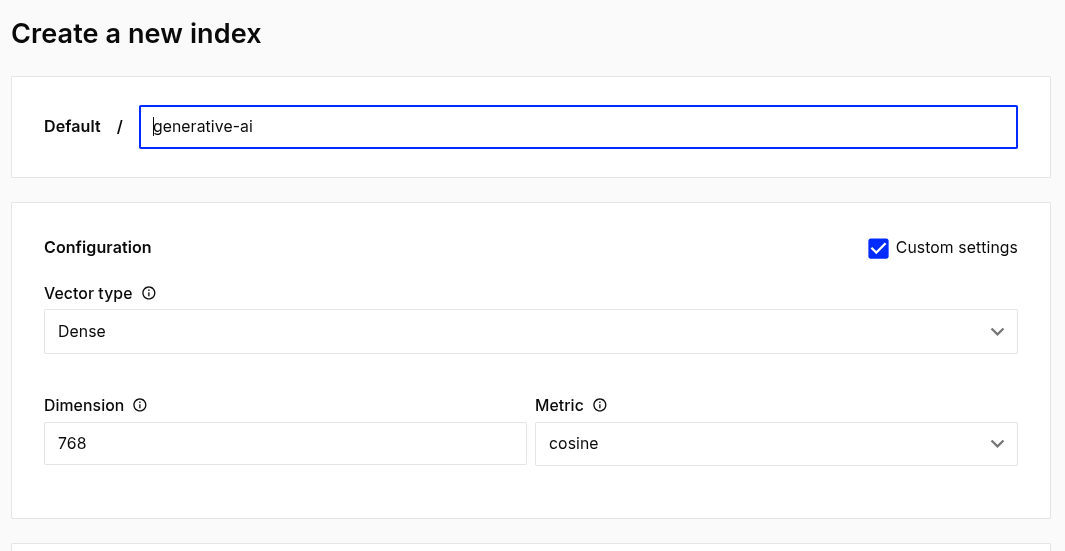

1. Let’s start by going to the **Pinecone dashboard** and logging in to your account.
2. From the top navigation bar, let’s click on **Database**.
3. Next, let’s click **Create Index**.
4. Let’s enter a name for the new index (pick any name you prefer).

### Configuration

* **Vector type**: `Dense`
* **Dimensions**: `768`
* **Metric**: `cosine`

Let’s leave the other cloud options as they are by default.

5. Finally, let’s click **Create** to finish.


In [ ]:
from langchain_pinecone.vectorstores import Pinecone as PC
from pinecone import Pinecone

pc = Pinecone(api_key=PINECONE_API_KEY)

index_name = "generative-ai"
index = pc.Index(index_name)

/usr/local/lib/python3.12/dist-packages/langchain_pinecone/__init__.py:3: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from langchain_pinecone.vectorstores import Pinecone, PineconeVectorStore


### Create Embeddings for each of the Text Chunk

In [ ]:
# PineCone Vector DB Search
docsearch = PC.from_texts(
    [t.page_content for t in text_chunks],
    embedding=embeddings,
    index_name=index_name
)

In [ ]:
docsearch

In [ ]:
query="What is Attention Mechanism?"

docs = docsearch.similarity_search(query)  # Top-k search
docs

[Document(id='e9433bd9-6bc5-4005-a2e3-4ceac887450a', metadata={}, page_content='to memorize the words coming at the beginning\nof the sentences, which leads to poor translation\nof the source sentence. The Attention mechanism\njust addresses this issue, by retaining and utilising\nall the hidden state of the input sentence during the\ndecoding phase.\nDuring the decoding phase, the model creates\nan alignment between each time step of the de-\ncoder output and all of the encoder hidden state.\nWe need to learn this alignment. Each output of\nthe decoder can selectively pick out speciﬁc ele-\nments from the sequence to produce the output.\nSo, this allows the model to focus and pay more\n”Attention” to the relevant part of the input se-\nquence.\nThe ﬁrst attention model was proposed by Bah-\ndanau et al. (2014), there are several other types of\nattention proposed, such as the one by Luong et al.'),
 Document(id='cfe30c6b-e827-4bd2-8a7c-e9df3b595c10', metadata={}, page_content='to memo

In [ ]:
print(docs[0].page_content)

to memorize the words coming at the beginning
of the sentences, which leads to poor translation
of the source sentence. The Attention mechanism
just addresses this issue, by retaining and utilising
all the hidden state of the input sentence during the
decoding phase.
During the decoding phase, the model creates
an alignment between each time step of the de-
coder output and all of the encoder hidden state.
We need to learn this alignment. Each output of
the decoder can selectively pick out speciﬁc ele-
ments from the sequence to produce the output.
So, this allows the model to focus and pay more
”Attention” to the relevant part of the input se-
quence.
The ﬁrst attention model was proposed by Bah-
danau et al. (2014), there are several other types of
attention proposed, such as the one by Luong et al.


In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [ ]:
# Dry run without context
result = llm.invoke("What is attention mechanism in short description?")
print(result.content)

The attention mechanism allows a neural network to focus on the most relevant parts of the input data when making predictions, rather than treating all parts equally. It essentially assigns weights to different parts of the input, highlighting the important information and suppressing the irrelevant noise.


In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.prompts import PromptTemplate
from langchain_core.prompts import ChatPromptTemplate

# Setting up a system prompt
system_prompt = (
    "Use the given context to answer the question. "
    "If you don't know the answer, say you don't know. "
    "Use three sentence maximum and keep the answer concise. "
    "Context: {context}"
)

# Chat Prompt Template
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

retriever = docsearch.as_retriever()

question_answer_chain = create_stuff_documents_chain(llm, prompt)
chain = create_retrieval_chain(retriever, question_answer_chain)

In [ ]:
query="What is attention mechanism in short description?"
result = chain.invoke({"input": query})
print(result)

{'input': 'What is attention mechanism in short description?', 'context': [Document(id='cfe30c6b-e827-4bd2-8a7c-e9df3b595c10', metadata={}, page_content='to memorize the words coming at the beginning\nof the sentences, which leads to poor translation\nof the source sentence. The Attention mechanism\njust addresses this issue, by retaining and utilising\nall the hidden state of the input sentence during the\ndecoding phase.\nDuring the decoding phase, the model creates\nan alignment between each time step of the de-\ncoder output and all of the encoder hidden state.\nWe need to learn this alignment. Each output of\nthe decoder can selectively pick out speciﬁc ele-\nments from the sequence to produce the output.\nSo, this allows the model to focus and pay more\n”Attention” to the relevant part of the input se-\nquence.\nThe ﬁrst attention model was proposed by Bah-\ndanau et al. (2014), there are several other types of\nattention proposed, such as the one by Luong et al.'), Document(id='

In [ ]:
print(result["answer"])

The Attention mechanism addresses the issue of forgetting initial parts of sentences by retaining and utilizing all hidden states of the input sentence during decoding. It creates an alignment between each decoder output time step and all encoder hidden states. This allows the model to focus on relevant parts of the input sequence, improving translation.


In [ ]:
new_query = """
"How can attention mechanism improve the translation task?
What BLEU score was reported when using and not using the attention mechanism
"""

response = chain.invoke({"input": new_query})
response["answer"]

'The attention mechanism improves translation by retaining and utilizing all hidden states of the input sentence during decoding, allowing the model to focus on relevant parts of the input sequence. Bahdanau et al. (2014) achieved a BLEU score of 26.75 using the attention mechanism, while Cho et al. (2014b) reported a BLEU score of 17.82 without it. The attention mechanism addresses the issue of memorizing words at the beginning of sentences, which can lead to poor translation.'

In [ ]:
# Lets check its context
response["context"][0]

Document(id='0a04ce7a-c286-460e-a666-10d168c7d725', metadata={}, page_content='proach by Bahdanau et al. (2014), where the per-\nformance of the encoder-decoder with attention\nshows no deterioration with sentence of length\ngreater than 50 sentences. The result that we\ngot which was 25.76 was quite close to the Bah-\ndanau et al. (2014), where they got BLEU score of\n26.75,training with 1000 encoder and decoder di-\nmensions, and training on corpus of 384M words.\nThey were also able to achieve BLEU score of\n28.45 when trained the data until the performance\nof the validation stopped improving.\n6.2 Qualitative Results\nThe model proposed by Bahdanau et al. (2014)\nprovides a way to investigate the soft alignment\nbetween the translated sentence from the model\nand the input sentence. The matrix given in Fig\n3, each of the cells represent the weights αij of\nthe annotation of the j-th source word for the i-\nth target word. This helps in visualizing and see\nwhich word from the inp

In [ ]:
response["context"][1]

Document(id='cfe30c6b-e827-4bd2-8a7c-e9df3b595c10', metadata={}, page_content='to memorize the words coming at the beginning\nof the sentences, which leads to poor translation\nof the source sentence. The Attention mechanism\njust addresses this issue, by retaining and utilising\nall the hidden state of the input sentence during the\ndecoding phase.\nDuring the decoding phase, the model creates\nan alignment between each time step of the de-\ncoder output and all of the encoder hidden state.\nWe need to learn this alignment. Each output of\nthe decoder can selectively pick out speciﬁc ele-\nments from the sequence to produce the output.\nSo, this allows the model to focus and pay more\n”Attention” to the relevant part of the input se-\nquence.\nThe ﬁrst attention model was proposed by Bah-\ndanau et al. (2014), there are several other types of\nattention proposed, such as the one by Luong et al.')

> You can create a basic chatbot functionality by running the code cell block below

In [ ]:
import sys

while True:
  user_input = input(f"Input Prompt:\n\t")
  if user_input == "exit":
    print("Exiting!!!")
    sys.exit()
  if user_input == "":
    continue
  response = chain.invoke({"input": user_input})
  print(f"Response:\n\t{response["answer"]}\n")